## Observations and Insights 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
total_mice_df = pd.merge(study_results,mouse_metadata,how = 'left', on="Mouse ID")


# Display the data table for preview
total_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [81]:
# Checking the number of mice.
total_mice_df['Mouse ID'].value_counts().count()

249

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = total_mice_df.loc[total_mice_df.duplicated(subset =["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [83]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = total_mice_df[total_mice_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = total_mice_df[total_mice_df['Mouse ID']!='g989']
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [85]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].value_counts().count()

248

## Summary Statistics

In [62]:

mice_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std])

,mean,median,var,std
Drug Regimen,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188
Ceftamin,57.753977,59.851956,69.982735,8.365568
Infubinol,58.178246,60.165180,74.010875,8.602957
Ketapril,62.806191,64.487812,98.921330,9.945920
Naftisol,61.205757,63.283288,106.029927,10.297083
Placebo,60.508414,62.030594,78.759797,8.874672
Propriva,56.493884,55.591622,70.822755,8.415626
Ramicane,36.191390,36.561652,32.166354,5.671539
Stelasyn,61.001707,62.192350,90.331586,9.504293


In [100]:
# Generate aa summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_data = clean_mice_df[["Mouse ID", "Drug Regimen", "Sex", "Timepoint", "Tumor Volume (mm3)"]]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_drug = mice_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std])
sem_mice = mice_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_data_df = pd.merge(group_drug, sem_mice, on="Drug Regimen")
summary_data_df.rename(columns={"mean": "Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "Tumor Volume (mm3)":"Tumor Volume Std. Err"}, inplace=True)
summary_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
simple_tumor_df = pd.DataFrame({"Mean":[average_mice],"Median":[median_mice], 
                          "Var":[var_mice], "Std.":[std_mice],"Sem":[sem_mice]})

# Using the aggregation method, produce the same summary statistics in a single line
simple_tumor_df

,Mean,Median,Var,Std.,Sem
0,Drug Regimen Capomulin 36.667568 Ceftamin ...,Drug Regimen Capomulin 38.125164 Ceftamin ...,Drug Regimen Capomulin 32.663378 Ceftamin ...,Drug Regimen Capomulin 5.715188 Ceftamin ...,Drug Regimen Capomulin 1.143038 Ceftamin ...


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

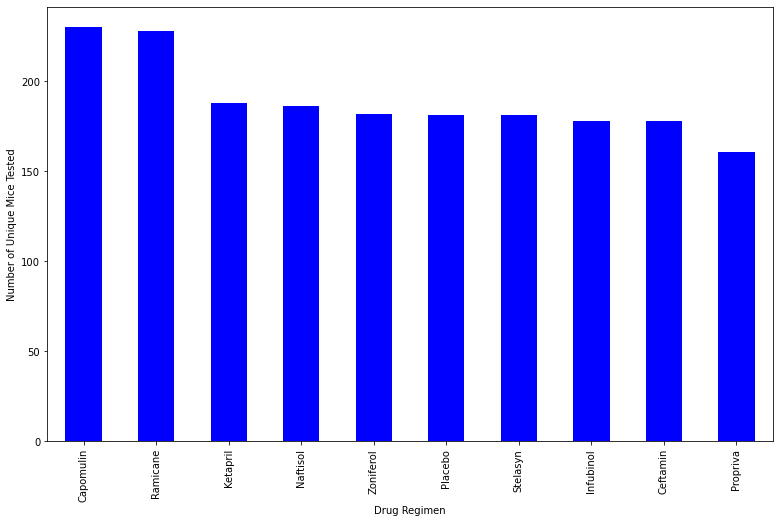

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = total_mice_df["Drug Regimen"].value_counts()

drug_data.plot(kind="bar", figsize=(13,8), facecolor = "blue")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

(array([228., 230., 178., 181., 178., 181., 182., 188., 161., 186.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

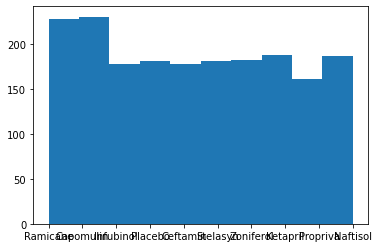

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.hist(total_mice_df["Drug Regimen"])



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
